In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 10,8

In [2]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

#Looking data format and types
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [3]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

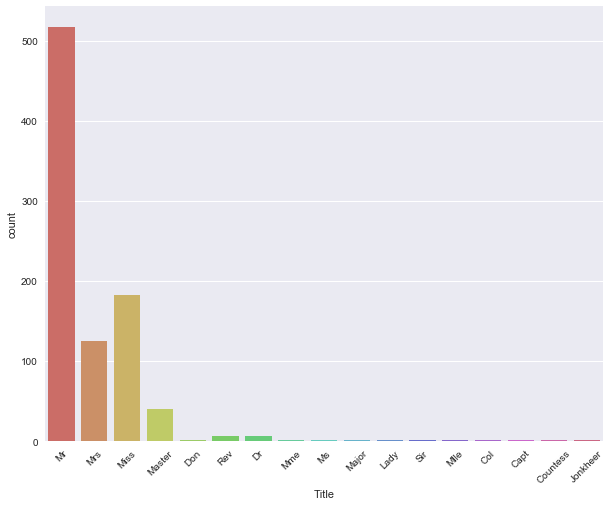

In [6]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xticks(rotation=45)
plt.show()

In [7]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [8]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

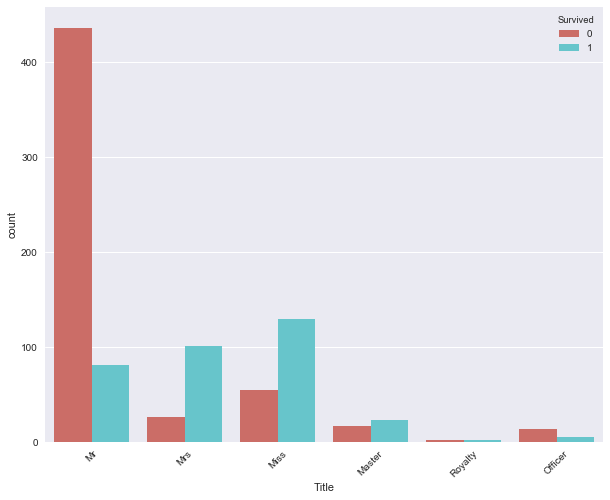

In [9]:
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
plt.xticks(rotation=45)
plt.show()

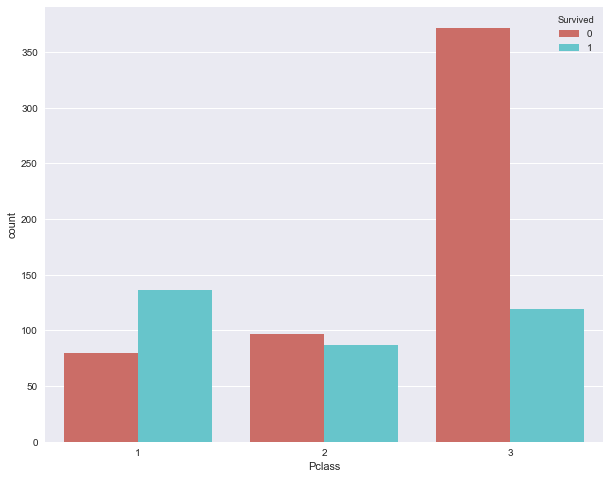

In [10]:
sns.countplot(x='Pclass', data=df_train, palette="hls",hue="Survived")

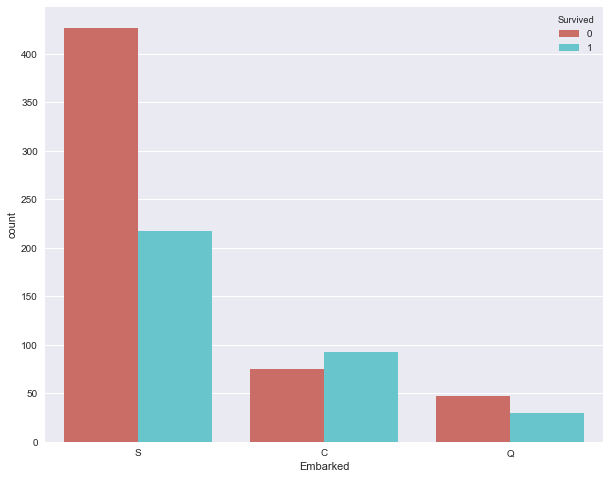

In [11]:
sns.countplot(x='Embarked', data=df_train, palette="hls",hue="Survived") #출항지

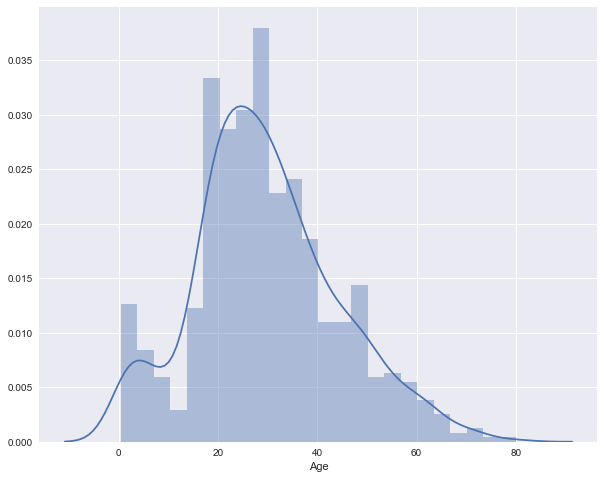

In [12]:
age_high_zero = df_train[df_train["Age"] > 0]

sns.distplot(age_high_zero["Age"], bins=24)

In [13]:
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [75]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
df_test.loc[df_test.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
print(df_train["Age"].isnull().sum())

0


In [76]:
Sex_Dictionary = {
        "male":     0,
        "female":    1
}
    
# we map each title to correct category
df_train['SexNum'] = df_train.Sex.map(Sex_Dictionary)
df_test['SexNum'] = df_test.Sex.map(Sex_Dictionary)

Embarked1_Dictionary = {
        "S":     1,
        "C":     0,
        "Q":     0
}
Embarked2_Dictionary = {
        "S":     0,
        "C":     1,
        "Q":     0
}
Embarked3_Dictionary = {
        "S":     0,
        "C":     0,
        "Q":    1
}
    
# we map each title to correct category
df_train['Embarked1Num'] = df_train.Embarked.map(Embarked1_Dictionary)
df_test['Embarked1Num'] = df_test.Embarked.map(Embarked1_Dictionary)
df_train['Embarked2Num'] = df_train.Embarked.map(Embarked2_Dictionary)
df_test['Embarked2Num'] = df_test.Embarked.map(Embarked2_Dictionary)
df_train['Embarked3Num'] = df_train.Embarked.map(Embarked3_Dictionary)
df_test['Embarked3Num'] = df_test.Embarked.map(Embarked3_Dictionary)

In [78]:
import tensorflow as tf

x_data = df_train[["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()
y_data = df_train["Survived"].as_matrix()
y_data = y_data.reshape(-1, 1)

x_datatest = df_test[["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()

#x_data = [[1,2],[2,3],[3,1], [4,3], [5,3], [6,2]]
#y_data = [[0], [0], [0], [1], [1], [1]]#fail 0 pass 1
print(x_data[1])
#print(y_data)


[  1.       1.      38.       1.       0.      71.2833]


In [94]:

column_X = 6
nb_classes = 1 #답의 가짓수

X = tf.placeholder(tf.float64, [None,column_X], name="X")
Y = tf.placeholder(tf.float64, [None,1], name="Y")


W = tf.Variable(tf.random_normal([column_X, nb_classes], name='weight', dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(tf.random_normal([nb_classes], name='bias', dtype=tf.float64), dtype=tf.float64)

#hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
#cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*(tf.log(1-hypothesis)))
#optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)

prediction = tf.cast(hypothesis > 0.5, dtype=tf.float64)
is_correct = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float64))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(20000):
    cost_val, _ = sess.run([cost, optimizer], feed_dict={X: x_data, Y: y_data})
    #print(step, "Cost: ", cost_val)
    
h, c = sess.run([hypothesis, prediction], feed_dict={X: x_datatest})

output = pd.DataFrame(data=c)

print(output)
df_test["Survived"] = output
result = df_test[["PassengerId", "Survived"]]
print(result)
result.to_csv("a.csv", sep=',', index=False)

       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
10   0.0
11   0.0
12   0.0
13   0.0
14   0.0
15   0.0
16   0.0
17   0.0
18   0.0
19   0.0
20   0.0
21   0.0
22   0.0
23   0.0
24   1.0
25   0.0
26   0.0
27   0.0
28   0.0
29   0.0
..   ...
388  0.0
389  0.0
390  0.0
391  0.0
392  1.0
393  0.0
394  0.0
395  0.0
396  0.0
397  0.0
398  0.0
399  0.0
400  1.0
401  0.0
402  0.0
403  0.0
404  0.0
405  0.0
406  0.0
407  1.0
408  0.0
409  0.0
410  0.0
411  0.0
412  0.0
413  0.0
414  0.0
415  0.0
416  0.0
417  0.0

[418 rows x 1 columns]
     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       0.0
4            896       0.0
5            897       0.0
6            898       0.0
7            899       0.0
8            900       0.0
9            901       0.0
10           902       0.0
11           903       0.0
12           904       0.0
13           905       0.0
14           